In [ ]:
import sys
sys.path.append('../..')

import pyotc

In [2]:
from scipy import pi

from pyotc.utilities import logspace_points_per_decade

from pyotc.psd import lorentzian_psd, hydro_psd, low_pass_filter
from pyotc.physics import MATERIALS

f = logspace_points_per_decade(10, 1e6)

T = (273.15 + 29) 
R = 0.5e-6
rho = MATERIALS['ps']
l = 4000e-6

kappa = 0.004 # N/m
f_c_0 = kappa / (2 * pi * pyotc.drag(R, T)).real
D_0 = pyotc.k_B * T / pyotc.drag(R, T).real

lor = lorentzian_psd(f, D_0, f_c_0) / lorentzian_psd(0.0, D_0, f_c_0)
hyd = hydro_psd(f, D_0, f_c_0, height=l, radius=R, temp=T, rho=rho) / hydro_psd(0.0, D_0, f_c_0, height=l, radius=R, temp=T)

alp = 0.1
f3dB = 8000
lor_lp = lor * low_pass_filter(f, alpha=alp, f3dB=f3dB)
hyd_lp = hyd * low_pass_filter(f, alpha=alp, f3dB=f3dB)


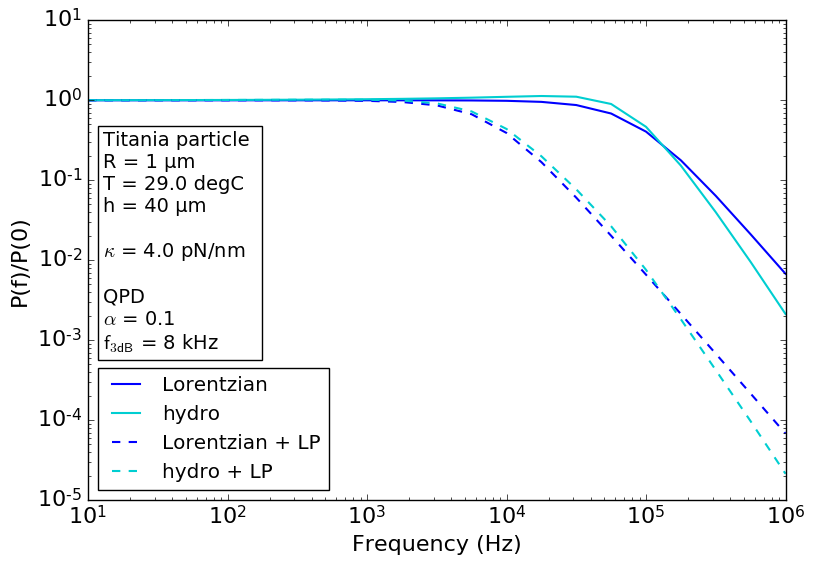

In [3]:
import matplotlib.pyplot as plt
from pyotc import add_plot_to_figure
from pyotc.plotting import col_dict

plt.close('all')

ax = add_plot_to_figure(None, f, lor, label='Lorentzian', fmt='-', color=col_dict[0])
fig = ax.figure
add_plot_to_figure(fig, f, hyd, label='hydro', fmt='-', color=col_dict[3])
add_plot_to_figure(fig, f, lor_lp, label='Lorentzian + LP', fmt='--', color=col_dict[0])
add_plot_to_figure(fig, f, hyd_lp, label='hydro + LP', fmt='--', color=col_dict[3],
                   logplot=True, showLegend=True, legend_kwargs={'loc':3},
                   xlabel='Frequency (Hz)', ylabel='P(f)/P(0)')
ax.set_ylim([1e-5, 10]);

s = ('Titania particle'
     ' \n'
     'R = 1 µm \n'
     'T = 29.0 degC \n'
     'h = 40 µm \n\n'
     '$\kappa$ = {0:1.1f} pN/nm \n\n'.format(kappa*1e3) +
     'QPD \n'
     r'$\alpha$ = 0.1'
     '\n'
     r'$\mathsf{f_{3dB}}$'
     ' = 8 kHz')

fig.text(0.142, 0.35, s, fontsize=14,
         bbox=dict(facecolor='none', edgecolor='black'))
fig

In [78]:
#ptf = './'
#fig.savefig(ptf, dpi=100, format='png')